In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('fact_bookings.csv')
data.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [8]:
df= data[['booking_date','revenue_realized']]
df



,booking_date,revenue_realized
0,2022-04-27,10010
1,2022-04-30,3640
2,2022-04-28,9100
3,2022-04-28,3640
4,2022-04-27,10920
...,...,...
134585,2022-07-29,32300
134586,2022-07-30,38760
134587,2022-07-30,12920
134588,2022-07-29,32300


In [12]:
df=df.rename(columns={'booking_date': 'date','revenue_realized':'revenue'})
df.head()

,date,revenue
0,2022-04-27,10010
1,2022-04-30,3640
2,2022-04-28,9100
3,2022-04-28,3640
4,2022-04-27,10920


In [14]:
df.dtypes

date       object
revenue     int64
dtype: object

In [19]:
dt=df.groupby('date')['revenue'].sum()
dt = pd.DataFrame(dt)
dt.head()

,revenue
date,
2022-04-07,366846
2022-04-08,199728
2022-04-09,218730
2022-04-10,1188911
2022-04-11,1049385


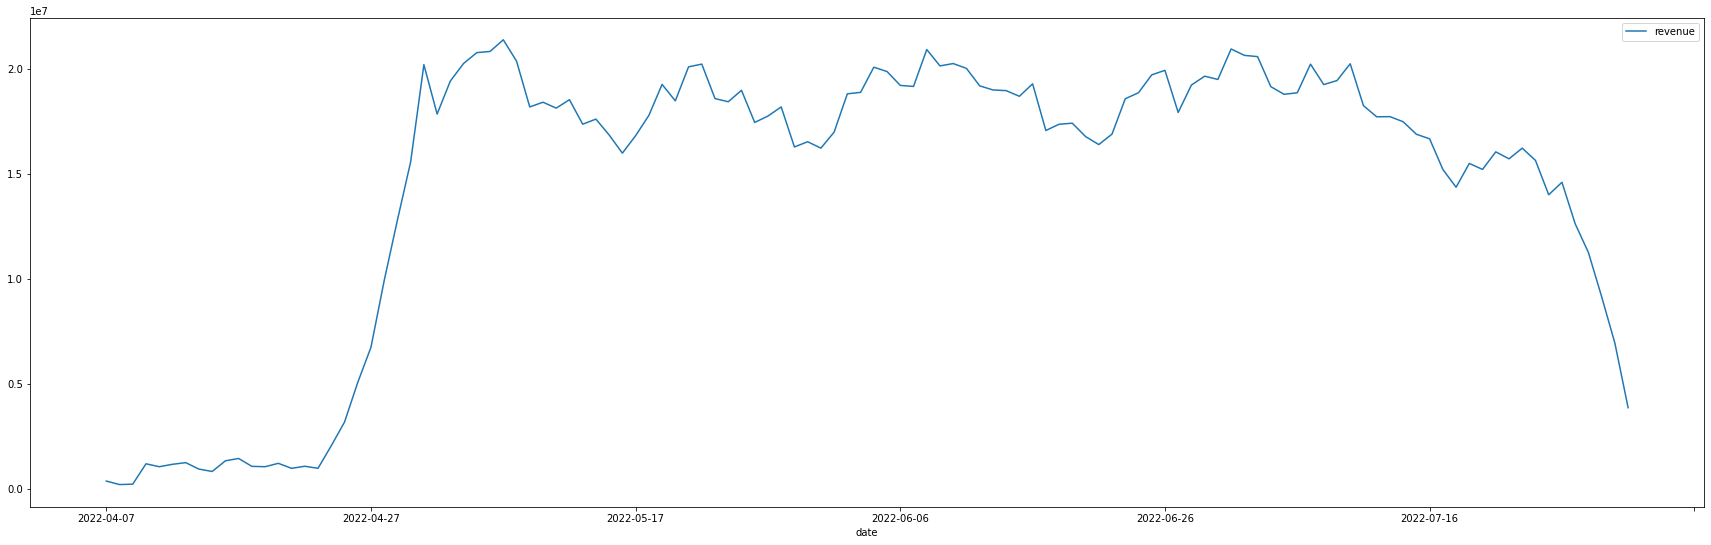

In [20]:
import matplotlib.pyplot as plt
pt=dt.plot( y='revenue', kind='line',figsize=(30,9))
plt.show()

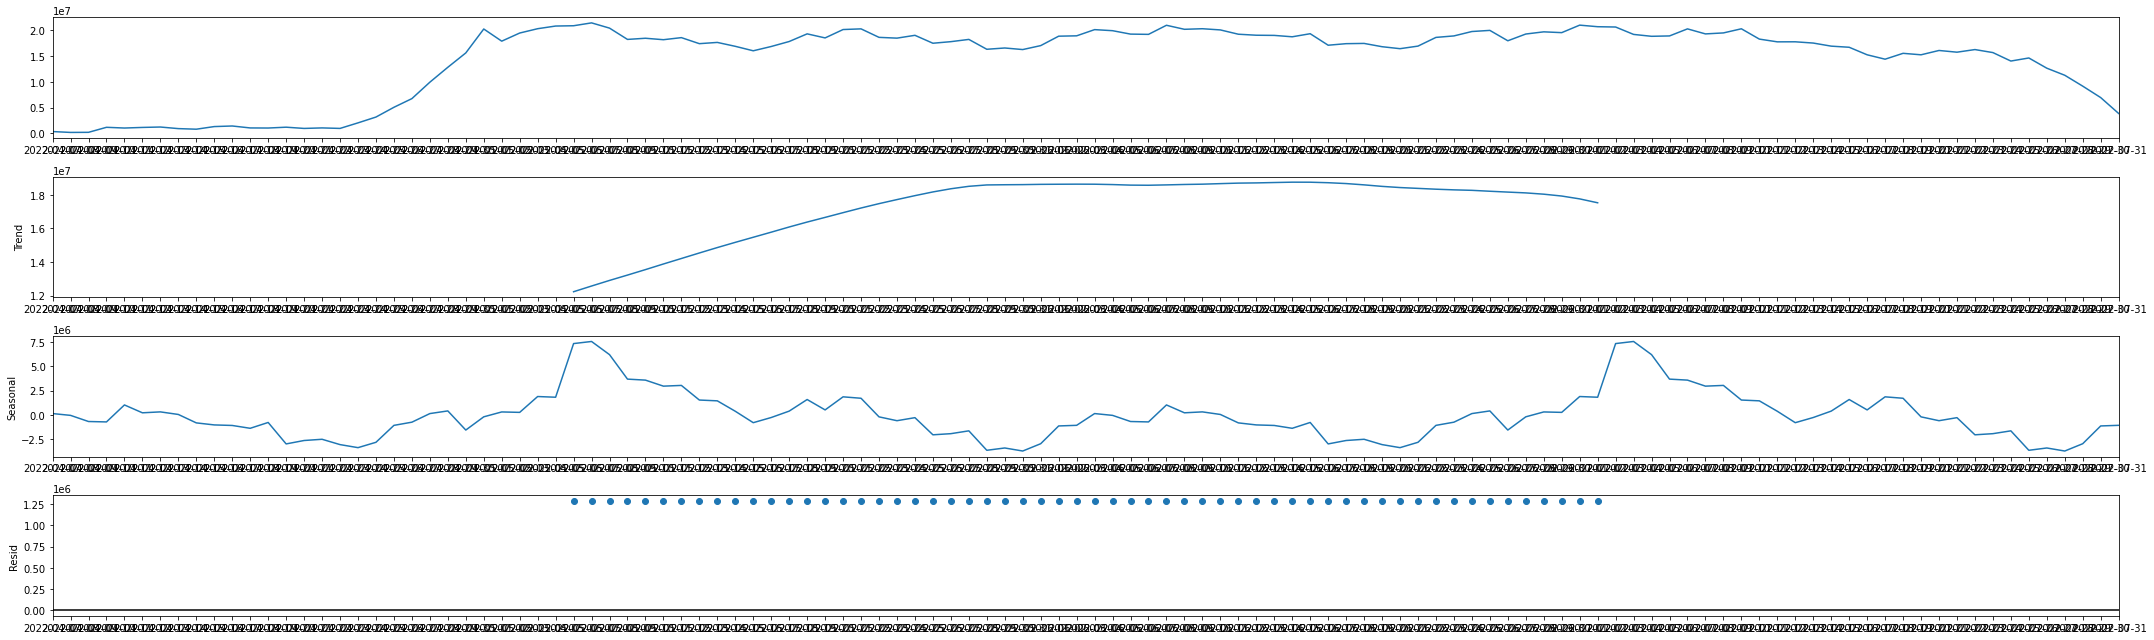

In [21]:
import statsmodels.api as sm
dcomp=sm.tsa.seasonal_decompose(dt,model="additive",period=int(len(dt)/2))
fig = dcomp.plot()
fig.set_size_inches((30, 9))
fig.tight_layout()
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dt)
print('ADF Statistic: %f' % result[0])
p=result[1]
rounded_num = '{0:.1f}'.format(p)
print('p-value:',rounded_num )   
print("Lags:",result[2])   

ADF Statistic: -2.080649
p-value: 0.3
Lags: 11


In [134]:
import numpy as np
dt['diff1']= dt['revenue']-dt['revenue'].shift(1)
dt.head()

,revenue,diff1
date,,
2022-04-07,366846,NaN
2022-04-08,199728,-167118.0
2022-04-09,218730,19002.0
2022-04-10,1188911,970181.0
2022-04-11,1049385,-139526.0


<AxesSubplot:xlabel='date'>

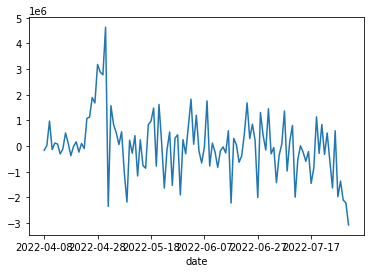

In [135]:
dt['diff1'].dropna().plot()

In [141]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dt['diff1'].dropna())
print('ADF Statistic: %f' % result[0])
p=result[1]
rounded_num = '{0:.1f}'.format(p)
print('p-value:',rounded_num )   
print("Lags:",result[2])   

ADF Statistic: -2.261264
p-value: 0.2
Lags: 10


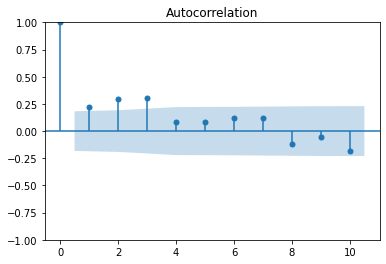

In [143]:
from statsmodels.graphics.tsaplots import plot_pacf ,plot_acf
plot_acf(dt['diff1'].dropna(),lags=10)
plt.show();

c:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


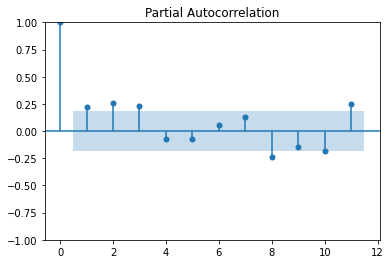

In [166]:
from statsmodels.graphics.tsaplots import plot_pacf ,plot_acf
plot_pacf(dt['diff1'].dropna(),lags=11)
plt.show();

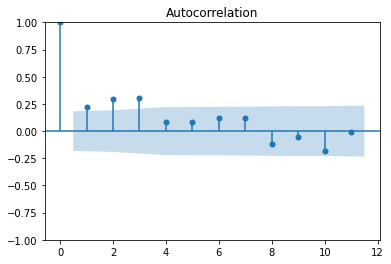

In [165]:
plot_acf(dt['diff1'].dropna(),lags=11)
plt.show()

In [153]:
len(dt['revenue'])

116

In [155]:
train=dt['revenue'][:80]
test=dt['revenue'][80:]

In [171]:
import pmdarima as pm
autoar = pm.auto_arima(train,stepwise=False,seasonal=False)
autoar

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True)

In [181]:
from statsmodels.tsa.arima.model import ARIMA
arima=ARIMA(train,order=(1,1,1)).fit()
print(arima.summary())


                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                   80
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1212.189
Date:                Sat, 11 Feb 2023   AIC                           2430.379
Time:                        23:47:58   BIC                           2437.487
Sample:                    04-07-2022   HQIC                          2433.227
                         - 06-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8199      0.163      5.034      0.000       0.501       1.139
ma.L1         -0.6001      0.245     -2.450      0.014      -1.080      -0.120
sigma2      1.227e+12   3.24e-14   3.79e+25      0.0

c:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\nithi

<AxesSubplot:xlabel='date'>

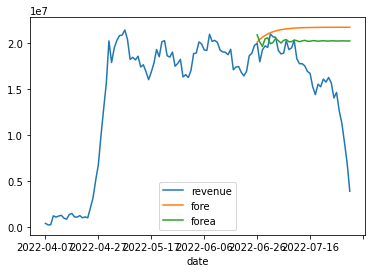

In [182]:
fore= arima.forecast(len(test))
dt['fore']=[None]*len(train)+list(fore)
dt.plot()

<AxesSubplot:xlabel='date'>

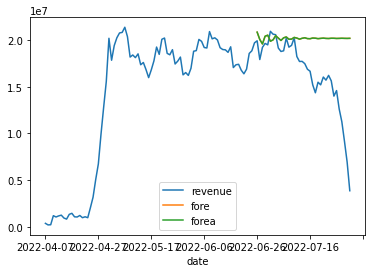

In [180]:
forea= autoar.predict(len(test))
dt['forea']=[None]*len(train)+list(fore)
dt.plot()